## Visualizing Earnings Based On College Majors
The dataset comes from https://github.com/fivethirtyeight/data/tree/master/college-majors. 
It is information on the job outcomes of students who graduated from college between 2010 and 2012. Here are some of the columns in the dataset:
- Rank: rank by median earnings
- Major_code : college major
- Major_category 
- Total : number of people with major
- Sample_size 
- Median : Median salary of full-time, year-round workers

Using Visualization, I intended to find out the answers to the following questions:

- Do students in more popular majors make more money? (Using scatter plots)
- How many majors are predominantly male? Predominantly female? (Using histograms)
- Which category of majors have the most students? (Using bar plots)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("data/recent-grads.csv")

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,AEROSPACE ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [5]:
raw_data_count = recent_grads.shape[0] #looking up the total number of rows
raw_data_count

173

In [6]:
#drop rows with null value
cleaned_data_count = recent_grads.dropna()
cleaned_data_count.shape[0]

172

The row count has decreased by one as a result.

## Data Visualization with Scatter Plots 

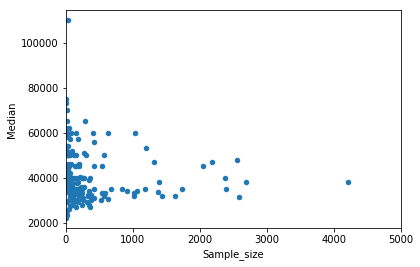

In [7]:
#Relationship between 'Sample_size' and 'Median'
cleaned_data_count.plot(kind="scatter", x='Sample_size', y ='Median', xlim=(0,5000))                        

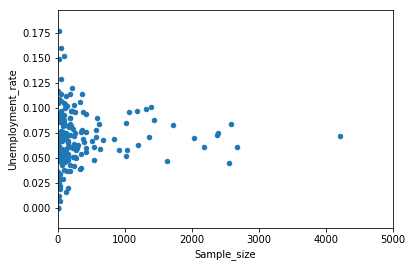

In [8]:
#Relationship between 'Sample_size' and 'Unemployment_rate'
cleaned_data_count.plot(kind="scatter", x="Sample_size", y = "Unemployment_rate", xlim=(0,5000))

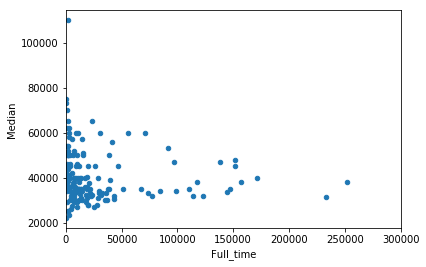

In [9]:
#Relationship between 'Full_time' and 'Median'
cleaned_data_count.plot(kind="scatter", x="Full_time", y="Median", xlim=(0,300000))

(0, 1.0)

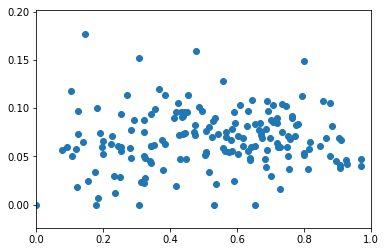

In [10]:
#Relationship between 'ShareWomen' and 'Unemployment_rate'
plt.scatter(cleaned_data_count['ShareWomen'], cleaned_data_count['Unemployment_rate'])
plt.xlim(0,1.0)

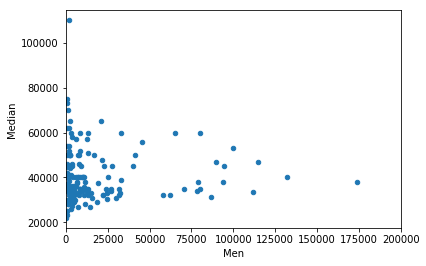

In [11]:
#Relationship between 'Men' and 'Median'
cleaned_data_count.plot(x='Men', y='Median', kind='scatter', xlim=(0, 200000))

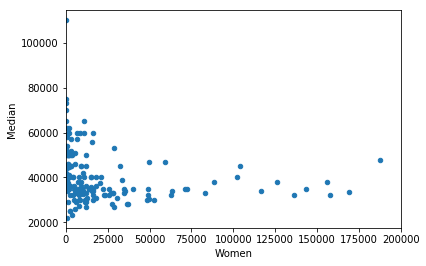

In [12]:
#Relationship between 'Women' and 'Median'
cleaned_data_count.plot(x='Women', y='Median', kind='scatter', xlim=(0,200000))

In [13]:
#Finding out the top 10 most popular majors
popular_majors=cleaned_data_count[['Major','Total', 'Median']].sort_values(by="Total", ascending=False).head(10)
popular_majors

,Major,Total,Median
145,PSYCHOLOGY,393735.0,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,38000
123,BIOLOGY,280709.0,33400
57,GENERAL BUSINESS,234590.0,40000
93,COMMUNICATIONS,213996.0,35000
34,NURSING,209394.0,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,38000
40,ACCOUNTING,198633.0,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,38000


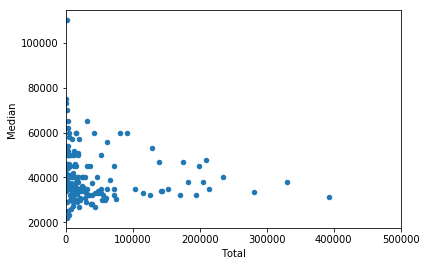

In [14]:
#See if more popular majors make more money to answer my first question
cleaned_data_count.plot(x='Total', y='Median', kind="scatter", xlim=(0,500000))

Conclusion: According to the result, I do see most popular majors (100,000 students and above) make less (in the 20,000 USD to 40,000 USD range). There are some less-popular majors make lower range as well but most of them are earning above the 40,000 USD level and the highest earner exceeds $100,000.

In [15]:
#Do students that majored in subjects that were majority female make more money?
#To explore that, I'll find out the top major that are popular among female

popular_female_majors=cleaned_data_count[['Major','ShareWomen','Median']].sort_values(by='ShareWomen',ascending=False).head(10)
popular_female_majors


,Major,ShareWomen,Median
164,EARLY CHILDHOOD EDUCATION,0.968954,28000
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998,28000
51,MEDICAL ASSISTING SERVICES,0.927807,42000
138,ELEMENTARY EDUCATION,0.923745,32000
150,FAMILY AND CONSUMER SCIENCES,0.910933,30000
100,SPECIAL NEEDS EDUCATION,0.906677,35000
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,0.905590,30000
151,SOCIAL WORK,0.904075,30000
34,NURSING,0.896019,48000
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,0.881294,36000


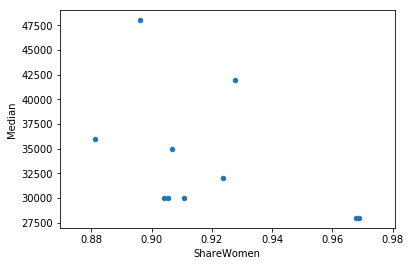

In [16]:
#Visualizing the result
popular_female_majors.plot(x='ShareWomen', y='Median', kind='scatter')

In [17]:
cleaned_data_count['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

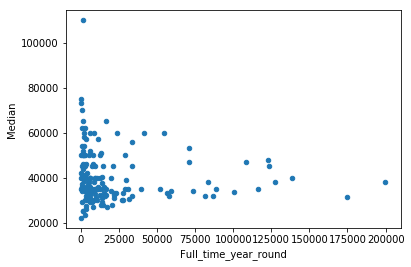

In [18]:
#Is there any link between the number of full-time employees and median salary?

cleaned_data_count.plot(x="Full_time_year_round", y="Median", kind="scatter")

Conclusion: There does not seem to be a link between the 2 components.

## Data Visualizations with Histograms

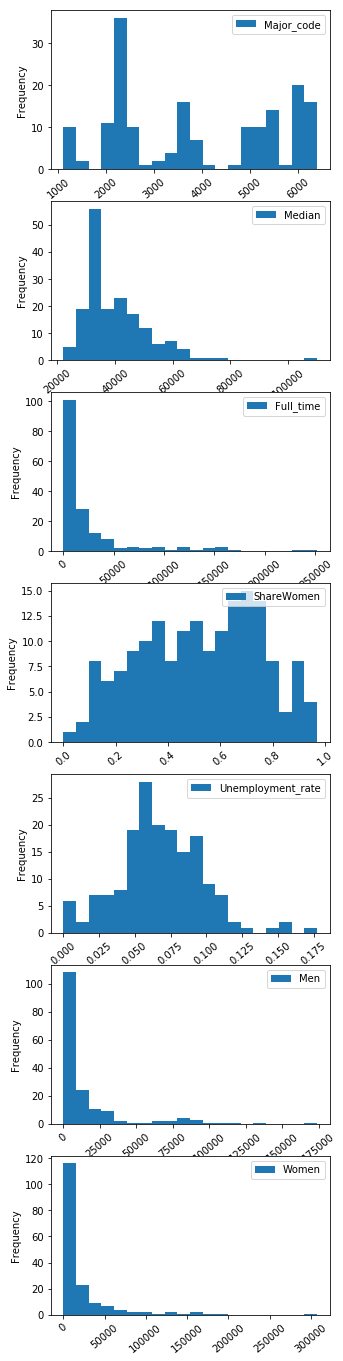

In [19]:
fig = plt.figure(figsize=(5,24))
cols = ["Major_code", "Median", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
for i in range(0,7):
    ax = fig.add_subplot(7,1,i+1)
    ax = cleaned_data_count[cols[i]].plot(kind="hist", rot=40, bins=20, label=cols[i])
    ax.legend(loc="upper right")

The major codes starting in low 2000 have the most students; the most common median salary range is low 30s.

## Data Visualizations with Scatter Matrix

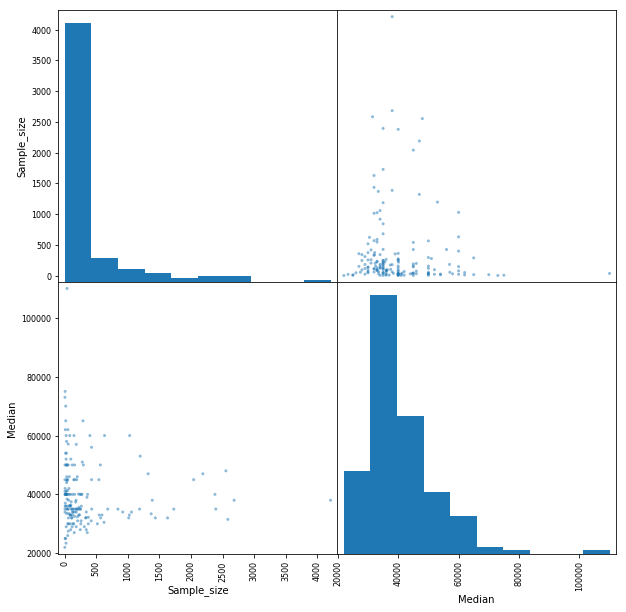

In [20]:
from pandas.plotting import scatter_matrix
a = scatter_matrix(cleaned_data_count[['Sample_size', 'Median']], figsize=(10,10))

In [21]:
cleaned_data_count.columns

Index([u'Rank', u'Major_code', u'Major', u'Total', u'Men', u'Women',
       u'Major_category', u'ShareWomen', u'Sample_size', u'Employed',
       u'Full_time', u'Part_time', u'Full_time_year_round', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th', u'College_jobs',
       u'Non_college_jobs', u'Low_wage_jobs'],
      dtype='object')

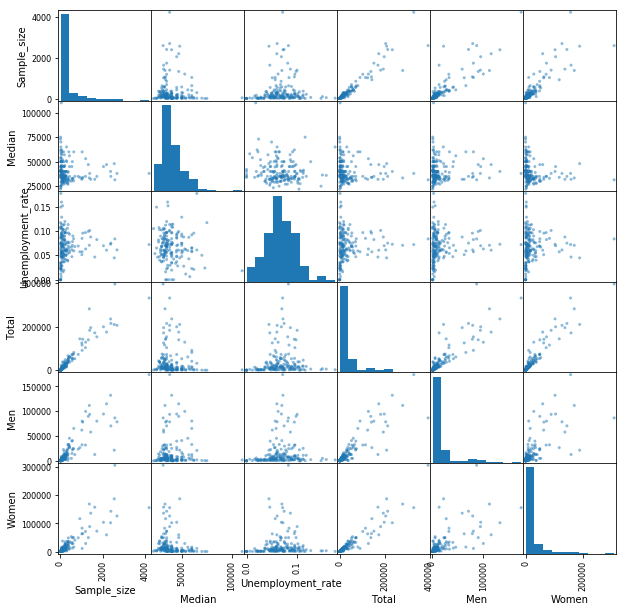

In [22]:
ax = scatter_matrix(cleaned_data_count[["Sample_size", "Median", "Unemployment_rate", "Total", "Men", "Women"]], figsize=(10,10))


## Data Visualizations with Bar Plots

I would like to know which are some of the male-dominant and female-dominant majors.

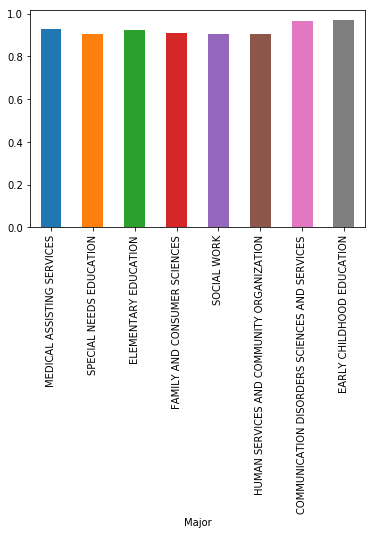

In [23]:
#Plotting Women dominant majors
a = cleaned_data_count[cleaned_data_count['ShareWomen']>0.9]
a.plot.bar(x='Major', y='ShareWomen', legend=False)


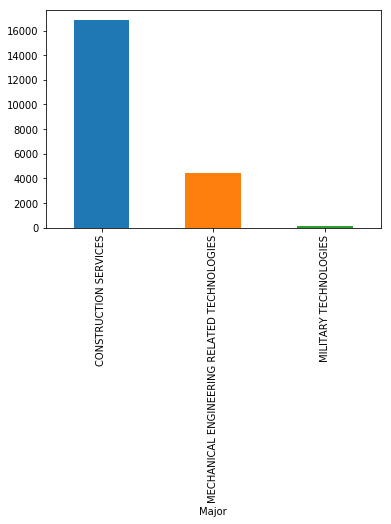

In [24]:
#Plotting male dominant majors
b = cleaned_data_count[(1-cleaned_data_count['ShareWomen'])>0.9]
b.plot.bar(x='Major', y='Men', legend=False)


Conclusion: Between 2010 and 2012, the most popular majors among women was Childhood educator; for men, they were construction workers and Engineers. Below is breakdown of the biggest and lowest share of women in each field.

Below is a breakdown of majors most popular among women vs. least popular.

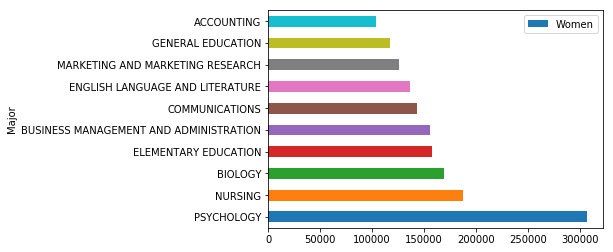

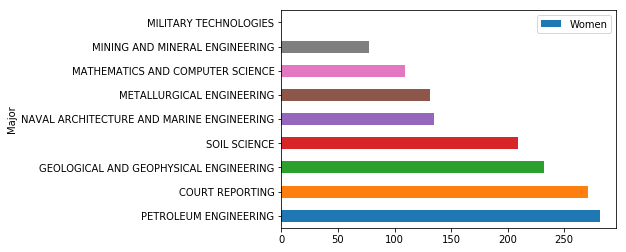

In [25]:
top_10_women = cleaned_data_count.sort_values(by='Women', ascending=False)[:10]
last_10_women = cleaned_data_count.sort_values(by='Women', ascending=False)[163:]
top_10_women.plot.barh(x='Major', y='Women')
last_10_women.plot.barh(x='Major', y='Women')

Most women majored in Pyschology and the least amount of women majored in Military Technologies.

Below is analysis on which majors have the most and least unemployment rates.

In [26]:
most_unemployed=cleaned_data_count.sort_values(by='Unemployment_rate', ascending=False).head(10)
least_unemployed=cleaned_data_count.sort_values(by='Unemployment_rate', ascending=False).tail(10)

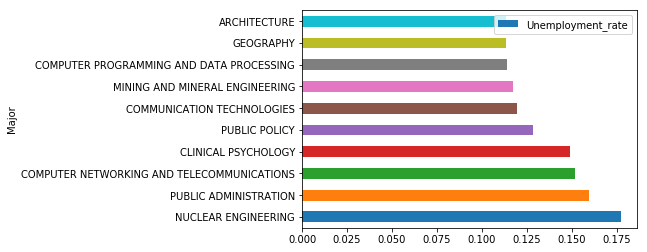

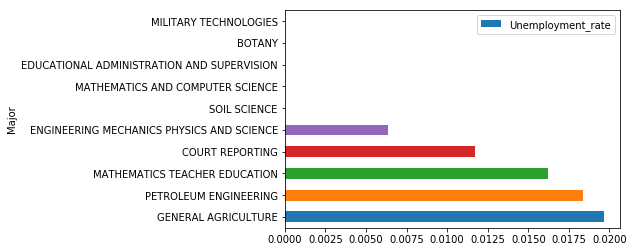

In [27]:
most_unemployed.plot.barh(x='Major', y='Unemployment_rate')
least_unemployed.plot.barh(x='Major', y='Unemployment_rate')

Major with most unemployment rate was Nuclear Engineering; major with least unemployment rate was Military Technologies.

Below is to find out which major category has the most female graduates.

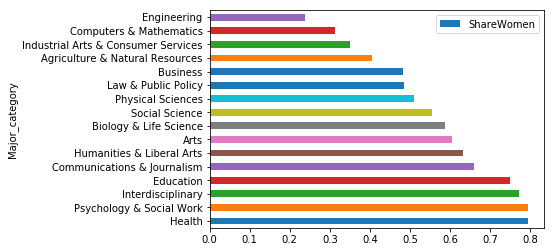

In [28]:
import numpy as np
top_women_category = cleaned_data_count.groupby('Major_category').agg(np.mean).sort_values(by='ShareWomen',ascending=False)
top_women_category.reset_index(level=0, inplace=True)
top_women_category.plot.barh(x='Major_category',y='ShareWomen')

The health field is most saturated with female graduates. Below I find out the same for male dominant major category. First I will create a new column for 'ShareMen', which is the opposite of 'ShareWomen'.

In [29]:
cleaned_data_count = cleaned_data_count.copy()
cleaned_data_count['ShareMen'] = 1 - cleaned_data_count['ShareWomen']
cleaned_data_count[['Major', 'ShareMen', 'ShareWomen']].head()

,Major,ShareMen,ShareWomen
0,PETROLEUM ENGINEERING,0.879436,0.120564
1,MINING AND MINERAL ENGINEERING,0.898148,0.101852
2,METALLURGICAL ENGINEERING,0.846963,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.892687,0.107313
4,CHEMICAL ENGINEERING,0.658369,0.341631


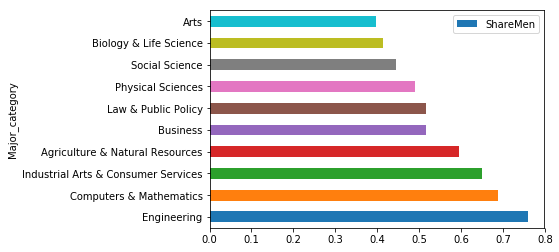

In [30]:
top_male_category=cleaned_data_count.groupby('Major_category').agg(np.mean).sort_values(by='ShareMen',ascending=False).head(10)
top_male_category.reset_index(inplace=True)
top_male_category.plot.barh(x='Major_category', y='ShareMen')

## Data Visualization using Boxplot
Use a box plot to explore the distribution of median salaries and Unemployment rate.

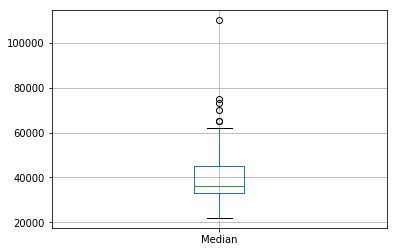

In [31]:
cleaned_data_count.boxplot('Median')

There were a few outliers of $60,000 or more. Median price is around mid 30s.

Here is the box plot for Unemployment rate.

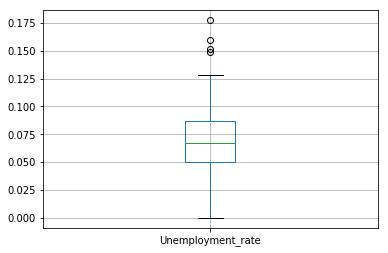

In [32]:
cleaned_data_count.boxplot('Unemployment_rate')

There are a few outliers above 0.125. I'll plot them to see which majors they are.

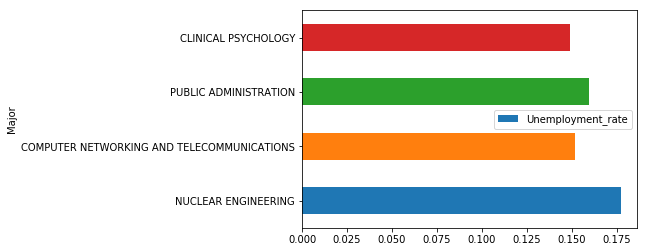

In [33]:
outliers = cleaned_data_count[cleaned_data_count['Unemployment_rate'].between(0.13, 0.18)]
outliers.plot.barh(x='Major', y='Unemployment_rate')